# Car Price Prediction Demo

This notebook demonstrates how to use the car price prediction model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_utils import CarDataProcessor
from neural_network import CarPricePredictor, ModelTrainer
import numpy as np

## Load and Preprocess Data

In [2]:
# Load data
df = pd.read_csv('car_price_data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5512, 10)


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [3]:
# Preprocess data
data_processor = CarDataProcessor()
X_train, X_test, y_train, y_test, features = data_processor.prepare_data(df)
print("Features used:", features)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Features used: ['kms_driven', 'age', 'fuel_type', 'transmission', 'ownership', 'engine']
Training set shape: (4409, 6)
Test set shape: (1103, 6)


## Train Model

In [4]:
# Create and train model
model = CarPricePredictor(input_size=len(features))
trainer = ModelTrainer(model)
train_losses, test_losses = trainer.train(X_train, y_train, X_test, y_test, epochs=100)

Epoch [10/100], Train Loss: 7.0949, Test Loss: 232.1891
Epoch [20/100], Train Loss: 7.1758, Test Loss: 230.1180
Epoch [30/100], Train Loss: 6.9834, Test Loss: 229.1642
Epoch [40/100], Train Loss: 6.9820, Test Loss: 228.3667
Epoch [50/100], Train Loss: 6.8929, Test Loss: 228.0348
Epoch [60/100], Train Loss: 7.1108, Test Loss: 229.3110
Epoch [70/100], Train Loss: 7.0273, Test Loss: 229.6636
Epoch [80/100], Train Loss: 6.9304, Test Loss: 228.7832
Epoch [90/100], Train Loss: 7.0166, Test Loss: 228.7325
Epoch [100/100], Train Loss: 6.8819, Test Loss: 228.2902


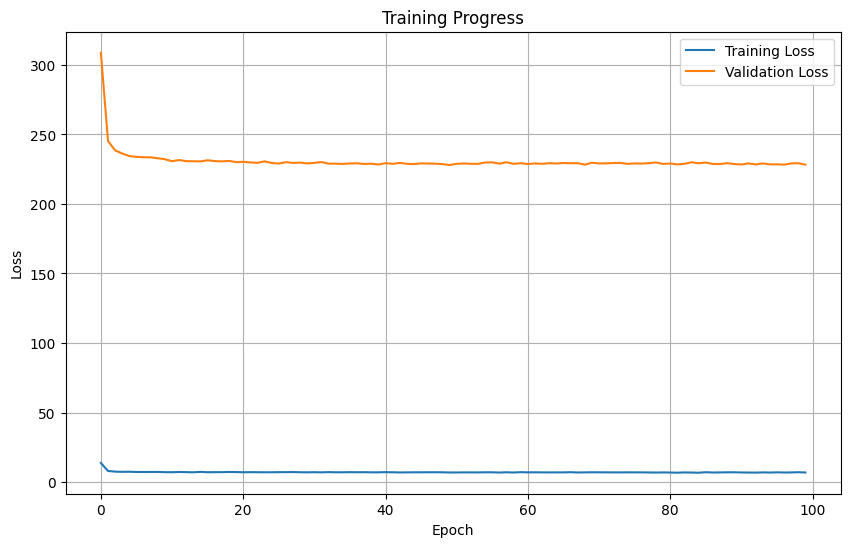

In [5]:
# Plot training progress
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate Model

Mean Squared Error: 228.2902
Mean Absolute Error: 5.9696
R² Score: 0.4331


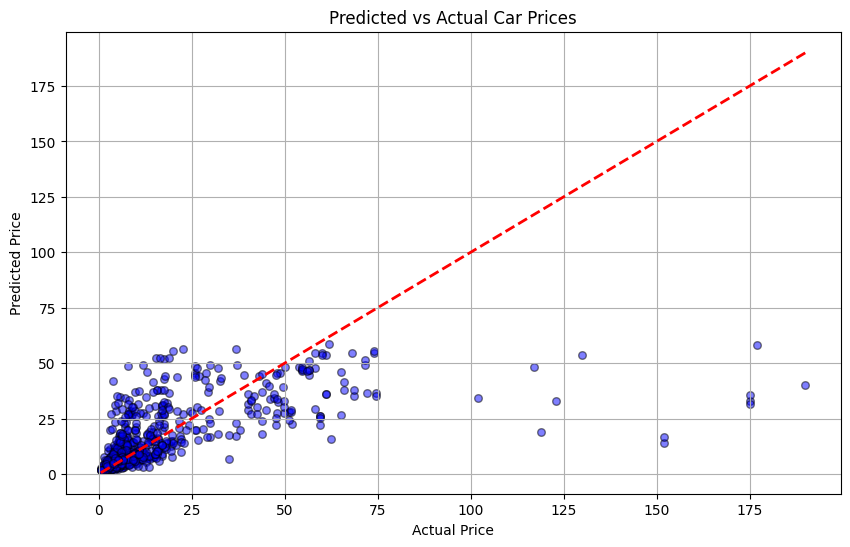

In [6]:
# Evaluate model performance
mse, mae, r2, predictions = trainer.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, c='blue', edgecolor='k', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Car Prices')
plt.grid(True)
plt.show()

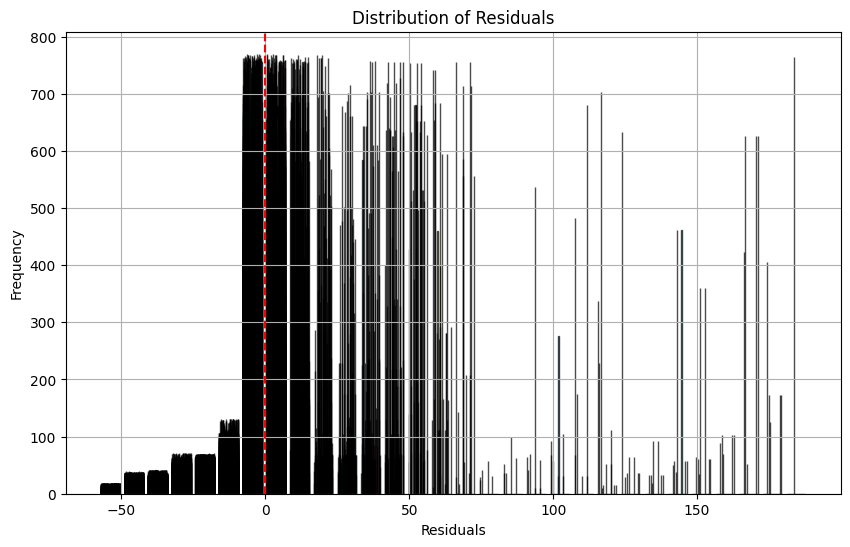

In [7]:
# Plotting residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.axvline(x=0, color='r', linestyle='--')
plt.show()